<a href="https://colab.research.google.com/github/River-unknown/AdobeGenSolve/blob/main/Copy_of_Adobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

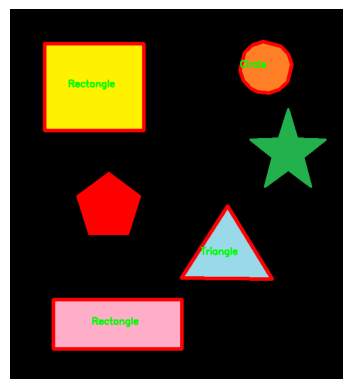

In [ ]:
# #detecting 2D shape
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np

# #Read the images
# img = cv2.imread("/content/drive/MyDrive/my best pic.jpeg")

# #converting the image to a greyscale image
# gray=cv2.cvtcolor(img,cv2.COLOR_BGR2GRAY)

# #adding the threshold value
# _,threshold=cv2.threshold(gray,127,255,cv2.THRESH_BINARY) # 1=white and 0=black

# #using findcounter to find and define the edges

# contour,_=cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) ## reterieve all corners =RETR_TREE and CHAIN_APPROX_SIMPLE= compress all horizonatl ,vertical and diagonal segments

# i=0

# #list for storing names of all the iamges

# for contour in contour:
#   if i==0:
#     i=1
#     continue

#     #cv2.approxPlayDP function
#   approx=cv2.approxPloyDP(
#       contour,0,0.1*cv2.arcLength(contour,True),True)

#   #drawContours function
#   cv2.drawContours(img,[contour],0,[0,0,255],5)

#   #finding the centre point of the shape
#   M=cv2.moments(contour)
#   if M['m00']!=0.0:
#     x=int(M["m10"]/M["m00"])
#     y=int(M["m01"]/M["m00"])

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image
# img = cv2.imread("/content/drive/MyDrive/my best pic.jpeg")
img = cv2.imread("/content/python_shapes_detection_base.png")


# Convert the image to a grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Add threshold to create a binary image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours to detect the edges
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through each contour to detect shapes
for contour in contours:
    # Approximate the contour with a polygon
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

    # Draw the contour on the original image
    cv2.drawContours(img, [approx], 0, (0, 0, 255), 5)

    # Find the center point of the shape
    M = cv2.moments(contour)
    if M['m00'] != 0:
        x = int(M["m10"] / M["m00"])
        y = int(M["m01"] / M["m00"])

        # Determine the shape based on the number of vertices
        if len(approx) == 3:
            shape_name = "Triangle"
        elif len(approx) == 4:
            aspect_ratio = float(cv2.boundingRect(approx)[2]) / cv2.boundingRect(approx)[3]
            if aspect_ratio >= 0.95 and aspect_ratio <= 1.05:
                shape_name = "Square"
            else:
                shape_name = "Rectangle"
        elif len(approx) == 5:
            shape_name = "Pentagon"
        elif len(approx) == 6:
            shape_name = "Hexagon"
        else:
            shape_name = "Circle"

        # Put the shape name at the center of the shape
        cv2.putText(img, shape_name, (x - 50, y), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display the final image with shapes detected
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()










In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


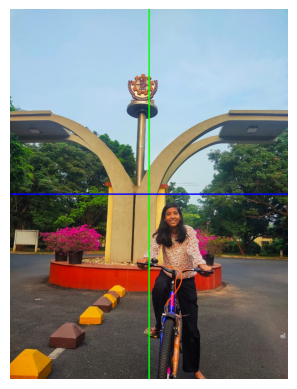

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("/content/drive/MyDrive/my best pic.jpeg")

# Get image dimensions
height, width, _ = img.shape

# Calculate the center points
center_x = width // 2
center_y = height // 2

# Draw the vertical symmetry line (center line)
cv2.line(img, (center_x, 0), (center_x, height), (0, 255, 0), 3)

# Draw the horizontal symmetry line (center line)
cv2.line(img, (0, center_y), (width, center_y), (255, 0, 0), 3)

# Display the image with symmetry lines
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


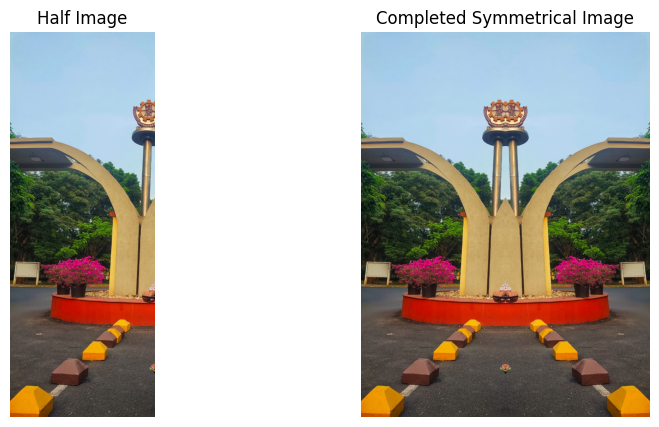

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the full image
img = cv2.imread("/content/drive/MyDrive/my best pic.jpeg")

# Get dimensions of the full image
height, width, _ = img.shape

# Cut the image in half (assume left half)
img_half = img[:, :width//2]

# Display the half image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_half, cv2.COLOR_BGR2RGB))
plt.title('Half Image')
plt.axis('off')

# Create an empty image to hold the complete image
complete_img = np.zeros((height, width, 3), dtype=np.uint8)

# Place the original half on the left side of the complete image
complete_img[:, :width//2] = img_half

# Mirror the half image to complete the right side
mirrored_half = cv2.flip(img_half, 1)  # Flip horizontally

# Place the mirrored half on the right side of the complete image
complete_img[:, width//2:] = mirrored_half

# Display the completed image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(complete_img, cv2.COLOR_BGR2RGB))
plt.title('Completed Symmetrical Image')
plt.axis('off')

# Show both images
plt.show()


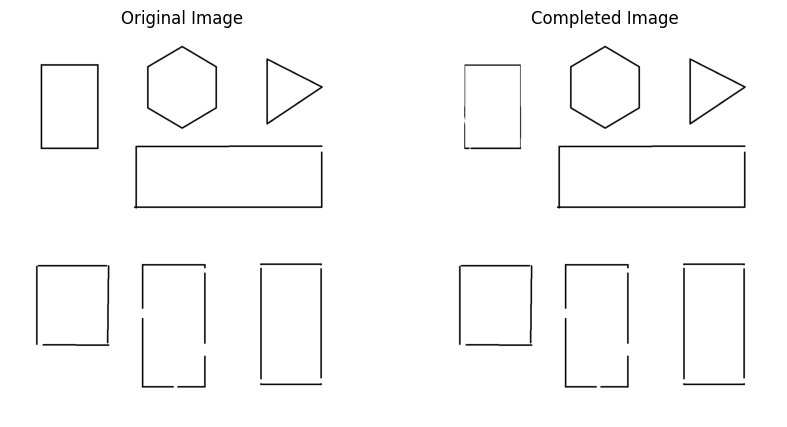

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Load the image
img = cv2.imread("/content/picimage complete.png")

# Convert to grayscale and apply edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edge map
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Assuming the largest contour is the incomplete curve
contour = max(contours, key=cv2.contourArea)

# Extract the contour points
points = contour[:, 0, :]

# Sort points by x (for a simple horizontal curve)
points = points[points[:, 0].argsort()]

# Extract x and y coordinates
x = points[:, 0]
y = points[:, 1]

# Ensure x and y are unique by removing duplicates
unique_points = np.unique(points, axis=0)
x = unique_points[:, 0]
y = unique_points[:, 1]

# Check if we have enough points for spline fitting (at least k+1 points)
if len(x) > 3:  # For cubic spline (k=3), need at least 4 points
    # Fit a spline to the detected points (curve fitting)
    tck, u = splprep([x, y], s=0)
    unew = np.linspace(0, 1, 100)
    out = splev(unew, tck)

    # Generate the completed curve points
    completed_curve = np.vstack(out).T

    # Create a mask to draw the completed contour
    mask = np.zeros_like(gray)

    # Draw the original contour (for visualization)
    for i in range(len(points) - 1):
        cv2.line(mask, tuple(points[i]), tuple(points[i + 1]), 255, 2)

    # Draw the completed contour
    for i in range(len(completed_curve) - 1):
        cv2.line(mask, tuple(completed_curve[i].astype(int)), tuple(completed_curve[i + 1].astype(int)), 255, 2)

    # Use the mask to fill the missing part in the original image
    completed_image = img.copy()
    completed_image[mask == 255] = (255, 255, 255)  # White color for the missing parts

    # Display the original and completed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Completed Image')
    plt.imshow(cv2.cvtColor(completed_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()
else:
    print("Not enough unique points to fit a spline.")
